<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Standard-Scaler" data-toc-modified-id="Standard-Scaler-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Scaler</a></span></li><li><span><a href="#Under-&amp;-Over-Sampling" data-toc-modified-id="Under-&amp;-Over-Sampling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Under &amp; Over Sampling</a></span></li><li><span><a href="#Sampling-for-modelization" data-toc-modified-id="Sampling-for-modelization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sampling for modelization</a></span></li><li><span><a href="#Personalized-Metric" data-toc-modified-id="Personalized-Metric-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Personalized Metric</a></span></li><li><span><a href="#Features-Selection" data-toc-modified-id="Features-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Features Selection</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-(Baseline)" data-toc-modified-id="Logistic-Regression-(Baseline)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Logistic Regression (Baseline)</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-8.1.1.1"><span class="toc-item-num">8.1.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-8.1.1.2"><span class="toc-item-num">8.1.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-8.2.1.1"><span class="toc-item-num">8.2.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-8.2.1.2"><span class="toc-item-num">8.2.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-8.3.1.1"><span class="toc-item-num">8.3.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-8.3.1.2"><span class="toc-item-num">8.3.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-8.3.3"><span class="toc-item-num">8.3.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li></ul></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Best Model</a></span></li><li><span><a href="#Model-Saving" data-toc-modified-id="Model-Saving-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Saving</a></span></li></ul></div>

https://medium.com/henry-jia/how-to-score-your-credit-1c08dd73e2ed <br/>
https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pickle import load
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(42)

# Data Import

In [3]:
application_train = pd.read_csv('input/application_train.csv')
X = application_train.set_index('SK_ID_CURR').drop(columns=['TARGET'])
y = application_train.set_index('SK_ID_CURR')['TARGET']

# Data Preparation

In [4]:
X['TERM'] = X.AMT_CREDIT / X.AMT_ANNUITY
X['OVER_EXPECT_CREDIT'] = (X.AMT_CREDIT > X.AMT_GOODS_PRICE).map({False:0, True:1})
X['MEAN_BUILDING_SCORE_AVG'] = X.iloc[:, 44:58].mean(skipna=True, axis=1)
X['TOTAL_BUILDING_SCORE_AVG'] = X.iloc[:, 44:58].sum(skipna=True, axis=1)
X['FLAG_DOCUMENT_TOTAL'] = X.iloc[:, 96:116].sum(axis=1)
X['AMT_REQ_CREDIT_BUREAU_TOTAL'] = X.iloc[:, 116:122].sum(axis=1)
X['BIRTH_EMPLOTED_INTERVEL'] = X.DAYS_EMPLOYED - X.DAYS_BIRTH
X['BIRTH_REGISTRATION_INTERVEL'] = X.DAYS_REGISTRATION - X.DAYS_BIRTH
X['MEAN_BUILDING_SCORE_AVG'] = X.iloc[:, 44:58].mean(skipna=True, axis=1)
X['TOTAL_BUILDING_SCORE_AVG'] = X.iloc[:, 44:58].sum(skipna=True, axis=1)
X['INCOME_PER_FAMILY_MEMBER'] = X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS
X['SEASON_REMAINING'] = X.AMT_INCOME_TOTAL/4 -  X.AMT_ANNUITY
X['RATIO_INCOME_GOODS'] = X.AMT_INCOME_TOTAL -  X.AMT_GOODS_PRICE
X['CHILDREN_RATIO'] = X.CNT_CHILDREN / X.CNT_FAM_MEMBERS

In [5]:
from pipeline_functions import DataFrameFeatureUnion, SelectColumnsTransfomer
from pipeline_functions import DataFrameFunctionTransformer, backToDf

In [6]:
pipeline = load(open('preprocessing_features.pkl', 'rb'))

In [7]:
X = pipeline.fit_transform(X)

# Standard Scaler

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train_, x_test, y_train_, y_test = train_test_split(X, y, test_size=0.2)

# Under & Over Sampling

In [90]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Counter({0: 282686, 1: 24825})


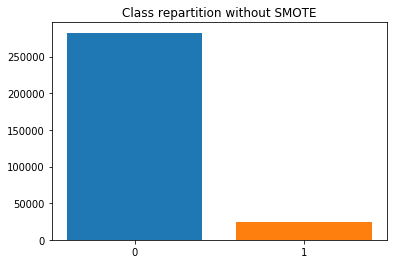

In [87]:
counter = Counter(y)
print(counter)
plt.bar("0", counter[0])
plt.bar("1", counter[1])
plt.title('Class repartition without SMOTE')
plt.show()

In [16]:
over = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_res, y_res = pipeline.fit_resample(x_train_, y_train_)

Counter({0: 90452, 1: 45226})


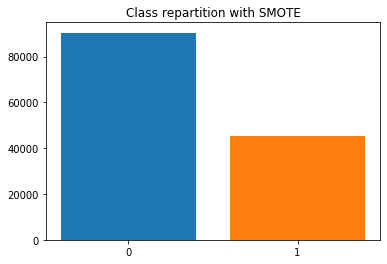

In [85]:
counter = Counter(y_res)
print(counter)
plt.bar("0", counter[0])
plt.bar("1", counter[1])
plt.title('Class repartition with SMOTE')
plt.show()

# Sampling for modelization

In [18]:
sample = np.random.randint(0, x_res.shape[0], 10000)
x_sample = x_res.iloc[sample,:]
y_sample = y_res[sample]
x_sample.shape

(10000, 132)

In [19]:
counter = Counter(y_sample)
print(counter)
plt.bar("0", counter[0])
plt.bar("1", counter[1])
plt.show()

Counter({0: 6643, 1: 3357})


In [20]:
sample_no_smote = np.random.randint(0, x_train_.shape[0], 10000)
x_train = x_train_.iloc[sample_no_smote,:]
y_train = y_train_.iloc[sample_no_smote]
x_train.shape

(10000, 132)

In [21]:
counter = Counter(y_train)
print(counter)

Counter({0: 9195, 1: 805})


# Personalized Metric

Calculate the performances of the model

In [22]:
def personalizedMetric(model_name, data, pred, saving=True, scores=None):
    """This function calculate a score based on a personalized metric ; 
    It creates a dataframe if it does not already exist, allowing you to keep the scores
    of your models in memory"""
    # Df init
    if scores is not None:
        df = scores        
    else:
        df = pd.DataFrame(columns=['Model', 'Score', 'false_positive',
                                   'false_negative', 'good_pred',
                                   'f1_score', 'AUC'])
    
    # Calculation of the score for current model:
    false_positive = 0
    false_negative = 0
    good_pred = 0
    model_score = 0
    f1_score = metrics.f1_score(data, pred, average='macro')
    fpr, tpr, thresholds = metrics.roc_curve(data, pred)
    AUC = metrics.auc(fpr, tpr)
    for i, j in zip(data, pred):
        if i == j:
            good_pred += 1
            model_score += 0
        elif i != j:
            if i == 0:
                false_positive += 1
                model_score += 1
            elif i == 1:
                false_negative += 1
                model_score += 7
    
    # Put the results in the df
    results = {"Model":model_name, "Score":model_score,
               "false_positive":false_positive, "false_negative":false_negative,
               "good_pred":good_pred, "f1_score":f1_score, "AUC":AUC}
    
    # if saving == True:
    df = df.append(results, ignore_index=True)
    
    return df

Plot the comparaison between models ; Either between SMOTE/NON SMOTE models, or between all the models

In [23]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


def comparaison(scores, type_='SMOTE', model='Baseline'):
    width = 0.35
    scores_ = scores

    if type_ == 'SMOTE':
        try:
            scores = scores[(scores['Model'] == model) | (scores['Model'] == model + ' Without SMOTE')]
            x = np.arange(len(scores['Model']))
            fig, ax = plt.subplots(figsize=(10,5))
            rects1 = ax.bar(x - width/2, scores['Score'], width, label='Score')
            #rects2 = ax.bar(x + width/2, scores['false_positive'], width, label='false_positive')
            rects2 = ax.bar(x + width/2, scores['false_negative'], width, label='false_negative')
            ax.set_xticks(x)
            ax.set_xticklabels(scores['Model'])
            ax.set_ylabel('Value')
            plt.yscale('log')
            ax.legend()

            autolabel(rects1, ax)
            autolabel(rects2, ax)

            fig.tight_layout()

            plt.show()
            
        except:
            print('The model paramater that you gave is not present in the DataFrame, please use a good model name')
            print('Model name currently present : ')
            print(scores_['Model'])

    elif type_ == 'MODEL':
        scores = scores[~scores['Model'].str.contains('Without SMOTE')]
        x = np.arange(len(scores['Model']))
        fig, ax = plt.subplots(figsize=(10,5))
        rects1 = ax.bar(x - width/2, scores['Score'], width, label='Score')
        #rects2 = ax.bar(x + width/2, scores['false_positive'], width, label='false_positive')
        rects2 = ax.bar(x + width/2, scores['false_negative'], width, label='false_negative')
        ax.set_xticks(x)
        ax.set_xticklabels(scores['Model'])
        ax.set_ylabel('Value')
        plt.yscale('log')
        ax.legend()

        autolabel(rects1, ax)
        autolabel(rects2, ax)

        fig.tight_layout()

        plt.show()
    
    else:
        print("Choose a correct type_ ; Available : MODEL, SMOTE. Default : SMOTE")

# Features Selection

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [25]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(x_sample, y_sample)
selector.support_

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,

In [26]:
selector.ranking_

array([ 84,   1,   1,  24,  68,  57,  15,  23,  55,  16,  18,  13,  86,
        76,  62,  67,  51,   7,   1,   1,   1,   1,   1,   3,   1,   1,
        12, 111,  92,  52, 109,  43,  89,  29,  37,  31,   5,  95,  90,
        93,  82,  69,  73,   1,   1,   1,  36,  46,  33,  66,  60,  87,
        53,  56,  72,  28,  65,  39,  81,  48,  22,  54,  14,  59,  63,
        80,  58,  70,  79,  34,  71,  30,  78,  38,  32,  35,  26,  44,
        47,  83,  40,  64,  74,  41,  50,  27,  85,  49,  25,  21,  61,
        17,  75,   1,  99,  42, 113,  94,  91, 112,  88,  97, 110, 100,
       108, 102, 101, 103,  96, 107,  98, 105, 106, 104,   6,  10,  20,
        11,   2,   1,   1,   1,   9,  19,  77,   1,   1,   1,   4,   1,
         8,  45])

In [27]:
x_sample = x_sample.iloc[:, selector.support_]
x_train = x_train.iloc[:, selector.support_]
x_train_ = x_train_.iloc[:, selector.support_]
x_res = x_res.iloc[:, selector.support_]
x_test = x_test.iloc[:, selector.support_]

In [28]:
x_test.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'TERM', 'OVER_EXPECT_CREDIT', 'AMT_REQ_CREDIT_BUREAU_TOTAL',
       'BIRTH_EMPLOTED_INTERVEL', 'BIRTH_REGISTRATION_INTERVEL',
       'SEASON_REMAINING'],
      dtype='object')

# Modeling

## Logistic Regression (Baseline)

In [29]:
from sklearn.linear_model import LogisticRegression

### Training

#### Without SMOTE

In [30]:
clf_no_smote = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
clf_predict_no_smote = clf_no_smote.predict_proba(x_test)

In [31]:
clf_predict_df_no_smote = pd.DataFrame(clf_predict_no_smote, index=y_test.index, columns=['Class0', 'Class1'])
clf_predict_no_smote = np.where(clf_predict_no_smote[:,0] > 0.5, 0, 1)

#### With SMOTE

In [32]:
clf = LogisticRegression(max_iter=1000, random_state=42).fit(x_sample, y_sample)
clf_predict = clf.predict_proba(x_test)

In [33]:
clf_predict_df = pd.DataFrame(clf_predict, index=y_test.index, columns=['Class0', 'Class1'])

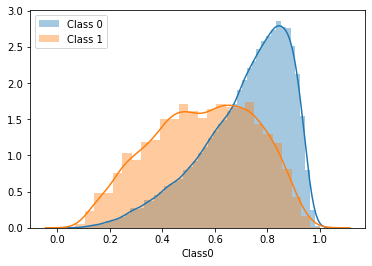

Mean for class 0: 0.7156315843987299
Mean for class 1: 0.5551596637194499


In [34]:
distrib = pd.merge(y_test, clf_predict_df['Class0'], left_index=True, right_index=True, how='inner')
sns.distplot(distrib[distrib['TARGET'] == 0]['Class0'], label='Class 0')
sns.distplot(distrib[distrib['TARGET'] == 1]['Class0'], label='Class 1')
plt.legend()
plt.show()
print('Mean for class 0:', distrib[distrib['TARGET'] == 0]['Class0'].mean())
print('Mean for class 1:', distrib[distrib['TARGET'] == 1]['Class0'].mean())

In [35]:
# Let's loop on the proba to see if which proba to choose to maximize the predictions
prob = pd.DataFrame(columns=['Model', 'Score', 'false_positive',
                             'false_negative', 'good_pred',
                             'f1_score', 'AUC'])
for i in np.arange(0,1,0.05):
    proba = clf_predict_df[['Class0']].copy()
    proba['Predict_bool'] = np.where(proba['Class0']>i, 0, 1)
    prob = personalizedMetric('LogReg:' + i.astype(str), y_test, proba['Predict_bool'], scores=prob)

In [36]:
prob

,Model,Score,false_positive,false_negative,good_pred,f1_score,AUC
0,LogReg:0.0,34643,0,4949,56554,0.479040,0.500000
1,LogReg:0.05,34643,0,4949,56554,0.479040,0.500000
2,LogReg:0.1,34597,10,4941,56552,0.480639,0.500720
3,LogReg:0.15000000000000002,34246,86,4880,56537,0.492459,0.506211
4,LogReg:0.2,33609,268,4763,56472,0.513036,0.516422
5,LogReg:0.25,32713,597,4588,56318,0.538975,0.531194
6,LogReg:0.30000000000000004,31680,1209,4353,55941,0.564322,0.549525
7,LogReg:0.35000000000000003,30567,2098,4067,55338,0.584451,0.570560
8,LogReg:0.4,29648,3300,3764,54439,0.594510,0.590546
9,LogReg:0.45,28623,4956,3381,53166,0.599294,0.614599


In [37]:
clf_predict = np.where(clf_predict[:,0] > 0.55, 0, 1)

### Performances

In [38]:
scores = personalizedMetric('Baseline', y_test, clf_predict)
scores = personalizedMetric('Baseline Without SMOTE', y_test, clf_predict_no_smote, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred,f1_score,AUC
0,Baseline,27684,9596,2584,49323,0.582457,0.654098
1,Baseline Without SMOTE,34336,57,4897,56549,0.489280,0.504750


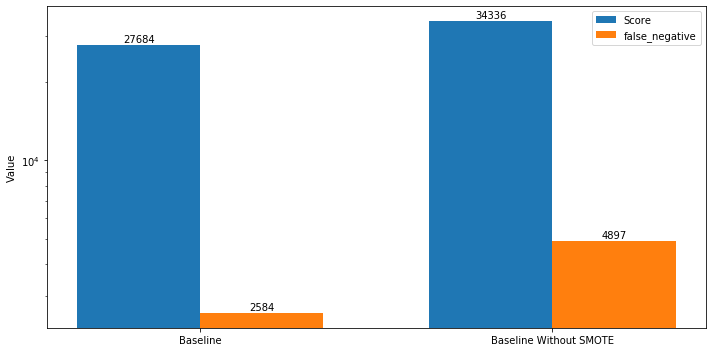

In [39]:
comparaison(scores, type_='SMOTE', model='Baseline')

As we can see here, without SMOTE the model does not seem to take into account the "1" class, the prediction looks good in general, but we are missing 1 class

### Features importance

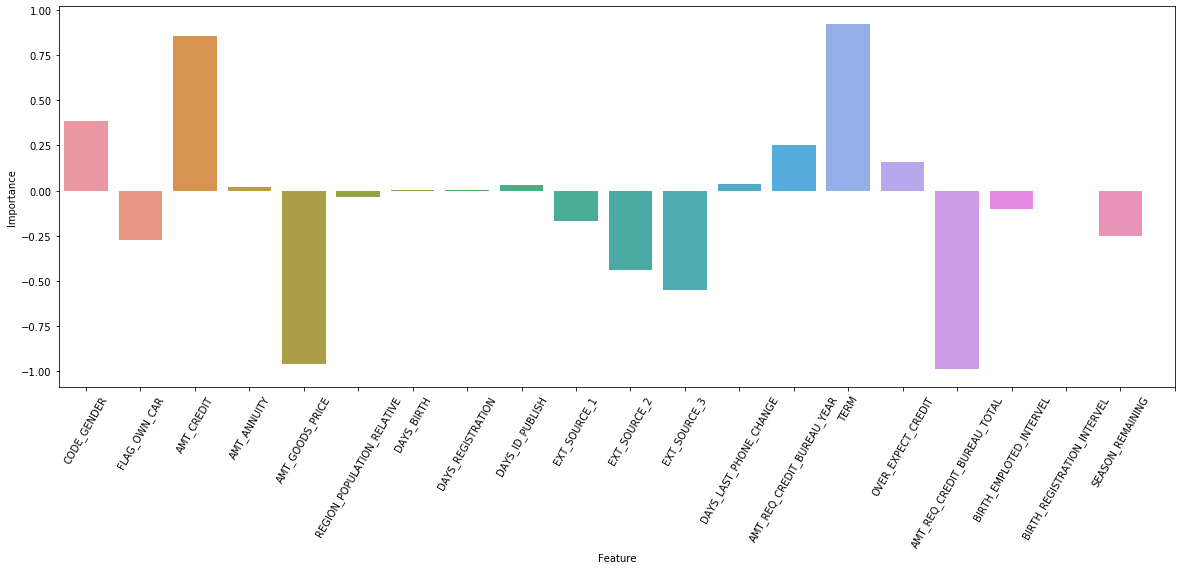

In [40]:
importance = clf.coef_[0]
importance = pd.DataFrame(importance, index=x_test.columns, columns=['Importance']).reset_index()
importance['Feature'] = [x for x in range(1, 21)]

# plot features importance
ax = plt.figure(figsize=(20,7))
ax = sns.barplot(importance['Feature'], importance['Importance'])
plt.xticks(range(0, 21), [x for x in importance['index'].unique()], rotation=60)
plt.show()

## Random Forest

In [41]:
from sklearn.model_selection import RandomizedSearchCV

### Training

#### Without SMOTE

In [42]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start=500,stop=2000,num=10)]
# Level max des arbres
max_depth = [int(x) for x in np.linspace(10,20,num=10)]
max_depth.append(None)
# nombre de sample min pour split
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# On crée la random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

t0 = time.perf_counter()

rfc_no_smote = RandomForestClassifier()

# On recherche avec 100 combinaisons différentes 
rfc_no_smote = RandomizedSearchCV(estimator=rfc_no_smote, param_distributions=random_grid, n_iter=150, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# On fit
rfc_no_smote.fit(x_train, y_train)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

rfc_no_smote.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 14.4min finished




Function elapsed in:  886.9895484000001 s


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [43]:
t0 = time.perf_counter()

rf_no_smote = RandomForestClassifier(n_estimators = list(rfc_no_smote.best_params_.values())[0],
                                     min_samples_split = list(rfc_no_smote.best_params_.values())[1],
                                     min_samples_leaf=list(rfc_no_smote.best_params_.values())[2],
                                     max_depth = list(rfc_no_smote.best_params_.values())[3],
                                     bootstrap=list(rfc_no_smote.best_params_.values())[4],
                                     n_jobs = -1)
rf_no_smote.fit(x_train, y_train)
# on prédit
y_predict_no_smote = rf_no_smote.predict_proba(x_test)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

y_predict_df_no_smote = pd.DataFrame(y_predict_no_smote, index=y_test.index, columns=['Class0', 'Class1'])



Function elapsed in:  3.562171100000114 s


In [44]:
y_predict_no_smote = np.where(y_predict_no_smote[:,0] > 0.5, 0, 1)

#### With SMOTE

In [45]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start=500,stop=2000,num=10)]
# Level max des arbres
max_depth = [int(x) for x in np.linspace(10,20,num=10)]
max_depth.append(None)
# nombre de sample min pour split
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# On crée la random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

t0 = time.perf_counter()

rfc = RandomForestClassifier()

# On recherche avec 100 combinaisons différentes 
rfc = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=150, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# On fit
rfc.fit(x_sample, y_sample)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

rfc.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 14.5min finished




Function elapsed in:  908.6153434000003 s


{'n_estimators': 1166,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

In [46]:
t0 = time.perf_counter()

rf = RandomForestClassifier(n_estimators = list(rfc.best_params_.values())[0],
                             min_samples_split = list(rfc.best_params_.values())[1],
                             min_samples_leaf=list(rfc.best_params_.values())[2],
                             max_depth = list(rfc.best_params_.values())[3],
                             bootstrap=list(rfc.best_params_.values())[4],
                             n_jobs = -1)
rf.fit(x_sample, y_sample)
# on prédit
y_predict = rf.predict_proba(x_test)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

y_predict_df = pd.DataFrame(y_predict, index=y_test.index, columns=['Class0', 'Class1'])



Function elapsed in:  6.754664300000059 s


In [47]:
y_predict = np.where(y_predict[:,0] > 0.5, 0, 1)

### Performances

In [48]:
scores = personalizedMetric('Random Forest', y_test, y_predict, scores=scores)
scores = personalizedMetric('Random Forest Without SMOTE', y_test, y_predict_no_smote, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred,f1_score,AUC
0,Baseline,27684,9596,2584,49323,0.582457,0.654098
1,Baseline Without SMOTE,34336,57,4897,56549,0.489280,0.504750
2,Random Forest,30334,3083,3893,54527,0.585579,0.579431
3,Random Forest Without SMOTE,34346,60,4898,56545,0.489061,0.504622


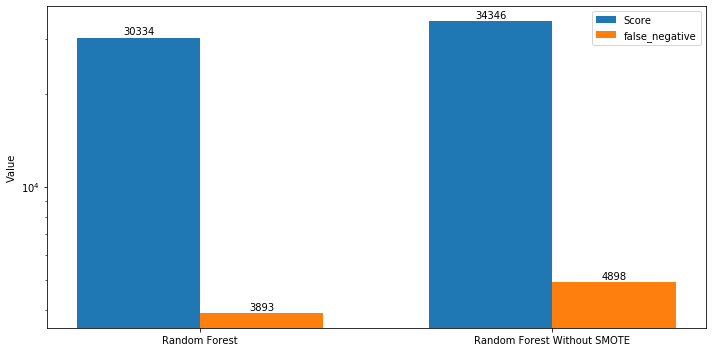

In [49]:
comparaison(scores, type_='SMOTE', model='Random Forest')

### Features importance

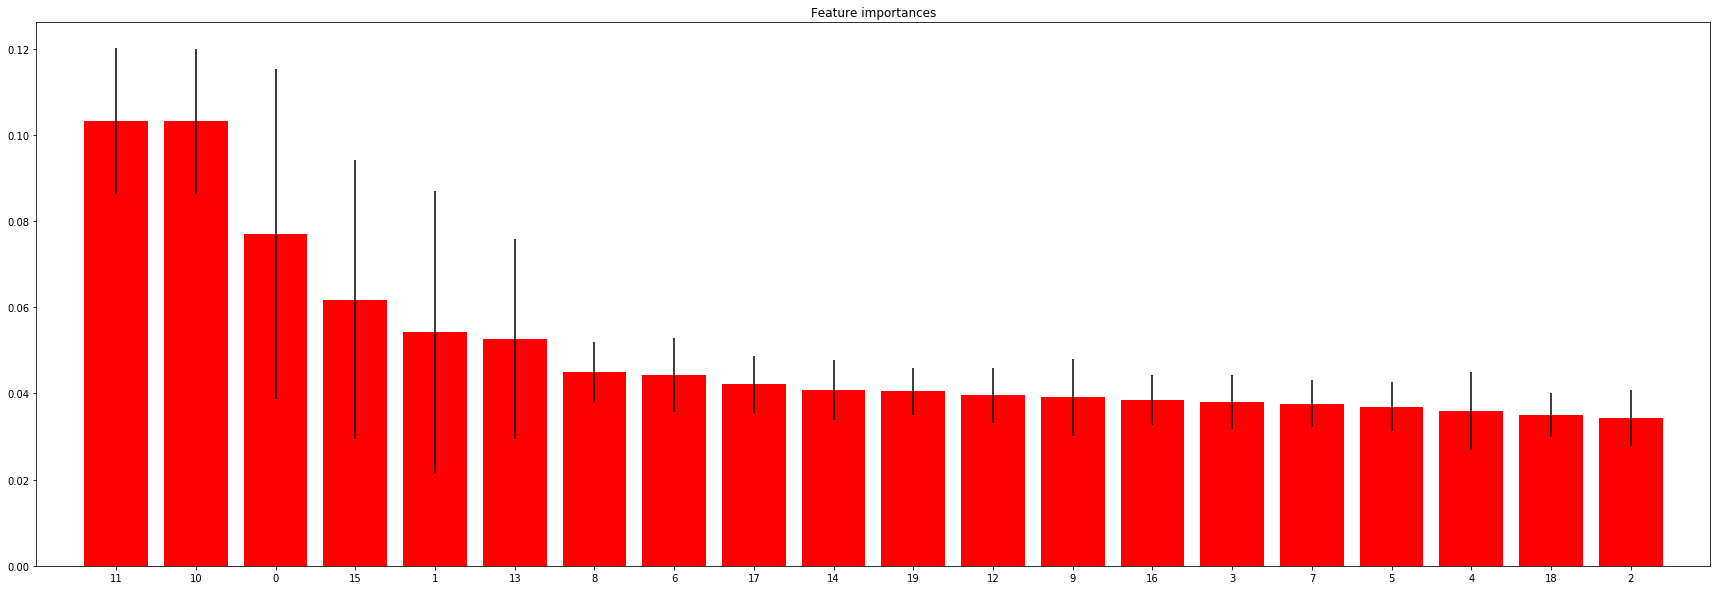

In [50]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(x_sample.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_sample.shape[1]), indices)
plt.xlim([-1, x_sample.shape[1]])
plt.show()

## XGBoost

In [51]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [52]:
dxsample = xgb.DMatrix(x_sample, label=y_sample)
dtrain  = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

### Training

#### Without SMOTE

In [53]:
# On crée la random grid
random_grid = {'eta': [0.02, 0.04, 0.06, 0.08, 0.1], 'max_depth': [5, 10, 15, 20],
               'subsample': [0.5, 0.7, 0.9, 1], 'colsample_bytree': [0.5, 0.7, 0.9, 1]}

bst_no_smote = XGBClassifier()

bst_no_smote_cv = RandomizedSearchCV(estimator=bst_no_smote, param_distributions=random_grid, n_iter=150, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

bst_no_smote_cv.fit(x_train, y_train)

bst_no_smote_cv.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.7min finished


{'subsample': 0.9, 'max_depth': 20, 'eta': 0.1, 'colsample_bytree': 0.5}

In [54]:
num_round = 50
bst_no_smote = xgb.train(bst_no_smote_cv.best_params_, dtrain, num_round)

In [55]:
ypred_no_smote = bst_no_smote.predict(dtest)
ypred_df_no_smote = pd.DataFrame(ypred_no_smote, index=y_test.index, columns=['Predict'])

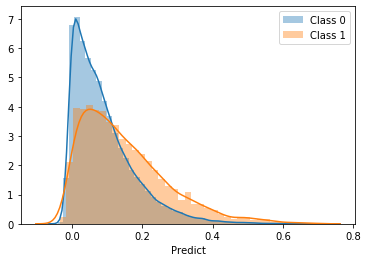

Mean for class 0: 0.08906372636556625
Mean for class 1: 0.1486419141292572


In [56]:
distrib = pd.merge(y_test, ypred_df_no_smote, left_index=True, right_index=True, how='inner')
sns.distplot(distrib[distrib['TARGET'] == 0]['Predict'], label='Class 0')
sns.distplot(distrib[distrib['TARGET'] == 1]['Predict'], label='Class 1')
plt.legend()
plt.show()
print('Mean for class 0:', distrib[distrib['TARGET'] == 0]['Predict'].mean())
print('Mean for class 1:', distrib[distrib['TARGET'] == 1]['Predict'].mean())

In [57]:
ypred_df_no_smote['Predict_bool'] = np.where(ypred_df_no_smote['Predict']>0.50, 1, 0)
ypred_no_smote_ = ypred_df_no_smote['Predict']

#### With SMOTE

In [58]:
# On crée la random grid
random_grid = {'eta': [0.02, 0.04, 0.06, 0.08, 0.1], 'max_depth': [5, 10, 15, 20],
               'subsample': [0.5, 0.7, 1], 'colsample_bytree': [0.5, 0.7, 1]}

bst = XGBClassifier()

bst_cv = RandomizedSearchCV(estimator=bst, param_distributions=random_grid, n_iter=150, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

bst_cv.fit(x_sample, y_sample)

bst_cv.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.8min finished


{'subsample': 1, 'max_depth': 10, 'eta': 0.1, 'colsample_bytree': 0.5}

In [59]:
num_round = 50
bst = xgb.train(bst_cv.best_params_, dxsample, num_round)

In [60]:
ypred = bst.predict(dtest)
ypred_df = pd.DataFrame(ypred, index=y_test.index, columns=['Predict'])

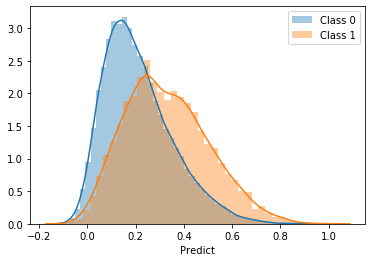

Mean for class 0: 0.2119373232126236
Median for class 0: 0.18791961669921875
Mean for class 1: 0.32948172092437744
Median for class 1: 0.31389278173446655


In [61]:
distrib = pd.merge(y_test, ypred_df, left_index=True, right_index=True, how='inner')
sns.distplot(distrib[distrib['TARGET'] == 0]['Predict'], label='Class 0')
sns.distplot(distrib[distrib['TARGET'] == 1]['Predict'], label='Class 1')
plt.legend()
plt.show()
print('Mean for class 0:', distrib[distrib['TARGET'] == 0]['Predict'].mean())
print('Median for class 0:', distrib[distrib['TARGET'] == 0]['Predict'].median())
print('Mean for class 1:', distrib[distrib['TARGET'] == 1]['Predict'].mean())
print('Median for class 1:', distrib[distrib['TARGET'] == 1]['Predict'].median())

In [62]:
# Let's loop on the proba to see if which proba to choose to maximize the predictions
prob = pd.DataFrame(columns=['Model', 'Score', 'false_positive',
                             'false_negative', 'good_pred',
                             'f1_score', 'AUC'])
for i in np.arange(0,1,0.05):
    proba = ypred_df.copy()
    proba['Predict_bool'] = np.where(proba['Predict']>i, 1, 0)
    prob = personalizedMetric('XGBoost:' + i.astype(str), y_test, proba['Predict_bool'], scores=prob)

In [63]:
prob['Score'].min()

29119

In [64]:
ypred_df['Predict_bool'] = np.where(ypred_df['Predict']>0.40, 1, 0)
ypred_ = ypred_df['Predict']

### Performances

In [65]:
scores = personalizedMetric('XGBoost', y_test, ypred_df['Predict_bool'], scores=scores)
scores = personalizedMetric('XGBoost Without SMOTE', y_test, ypred_df_no_smote['Predict_bool'], scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred,f1_score,AUC
0,Baseline,27684,9596,2584,49323,0.582457,0.654098
1,Baseline Without SMOTE,34336,57,4897,56549,0.489280,0.504750
2,Random Forest,30334,3083,3893,54527,0.585579,0.579431
3,Random Forest Without SMOTE,34346,60,4898,56545,0.489061,0.504622
4,XGBoost,29422,6161,3323,52019,0.584666,0.609806
5,XGBoost Without SMOTE,34219,115,4872,56516,0.493822,0.506763


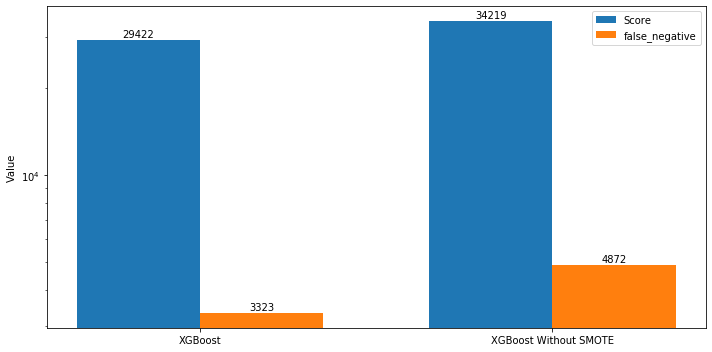

In [66]:
comparaison(scores, type_='SMOTE', model='XGBoost')

### Features importance

[]

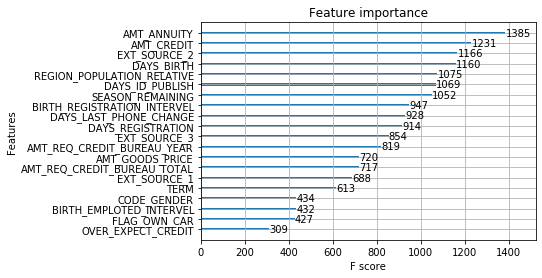

In [67]:
xgb.plot_importance(bst)
plt.plot()

The model is less effective if we watch only the accuracy score, but it understands better the problem and this time predict not only 0 values, but also 1 values

# Best Model

Let's see our DataFrame with the personalized metric:

In [68]:
scores

,Model,Score,false_positive,false_negative,good_pred,f1_score,AUC
0,Baseline,27684,9596,2584,49323,0.582457,0.654098
1,Baseline Without SMOTE,34336,57,4897,56549,0.489280,0.504750
2,Random Forest,30334,3083,3893,54527,0.585579,0.579431
3,Random Forest Without SMOTE,34346,60,4898,56545,0.489061,0.504622
4,XGBoost,29422,6161,3323,52019,0.584666,0.609806
5,XGBoost Without SMOTE,34219,115,4872,56516,0.493822,0.506763


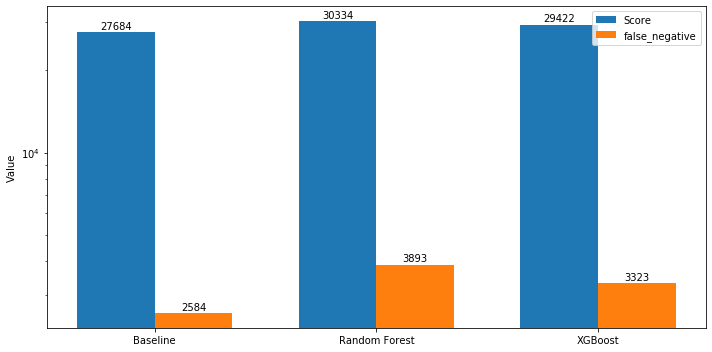

In [69]:
comparaison(scores, type_='MODEL')

The best model is logistic regression. The thing here is to reduce the number of false negative, in order for the bank to avoid loosing money. <br/>
So even if the number of good prediction is higher with the random forest (and XGBoost), logistic regression performs better in term of saving money

We'll now retrain the logistic regression with the full x_train dataset

In [70]:
clf_final = LogisticRegression(max_iter=1000, random_state=42).fit(x_res, y_res)
clf_final_predict = clf_final.predict(x_test)

# Model Saving

In [71]:
pickle.dump(clf_final, open('regLog', 'wb'))
bst.load_model('0001.model')